In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [3]:
!pwd

/Users/jeremypalmerio/Repos/CasualPresentation


In [10]:
fname = 'world_happiness/2015.csv'
df = pd.read_csv(fname, sep=',')

# Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [12]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [13]:
df.isna().any()

Country                          False
Region                           False
Happiness Rank                   False
Happiness Score                  False
Standard Error                   False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual                False
dtype: bool

In [14]:
df = df.drop(['Happiness Rank', 'Country', 'Region'], axis=1)

<Axes: >

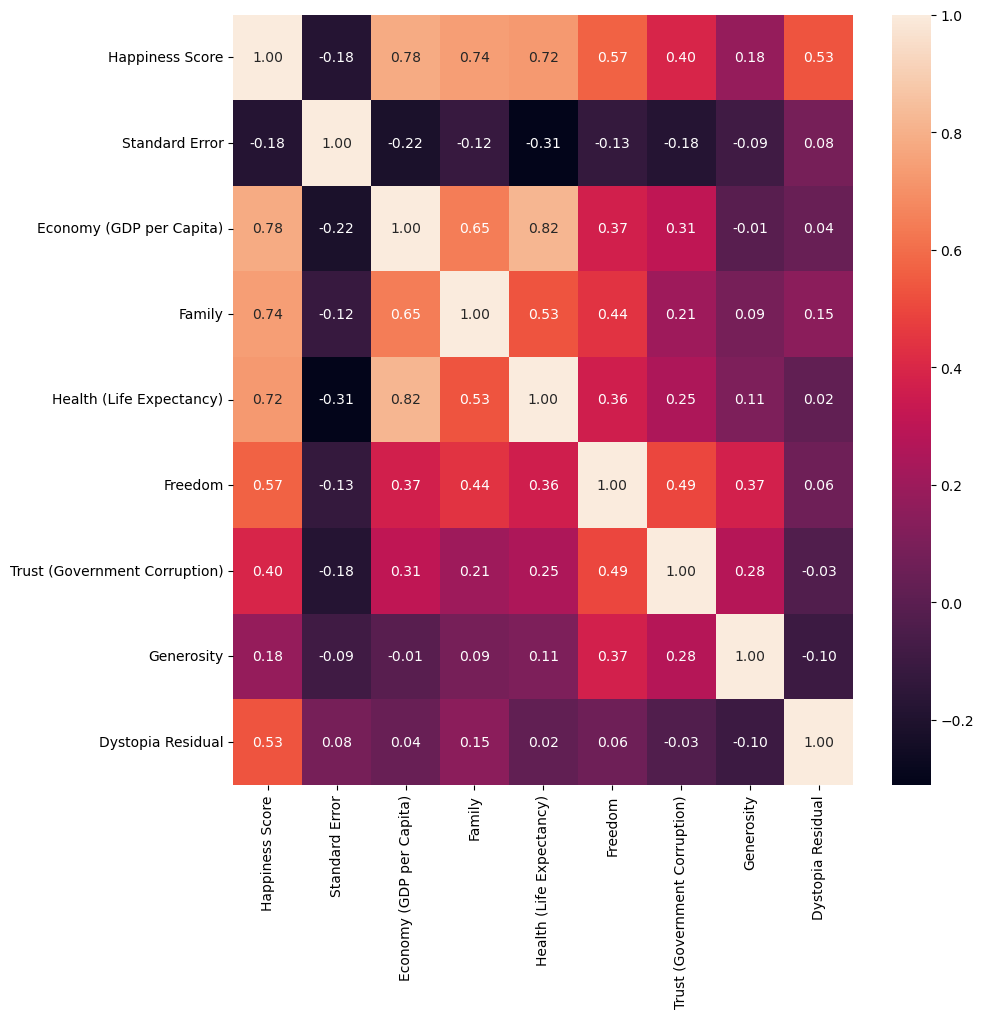

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)

### Making the Graph 


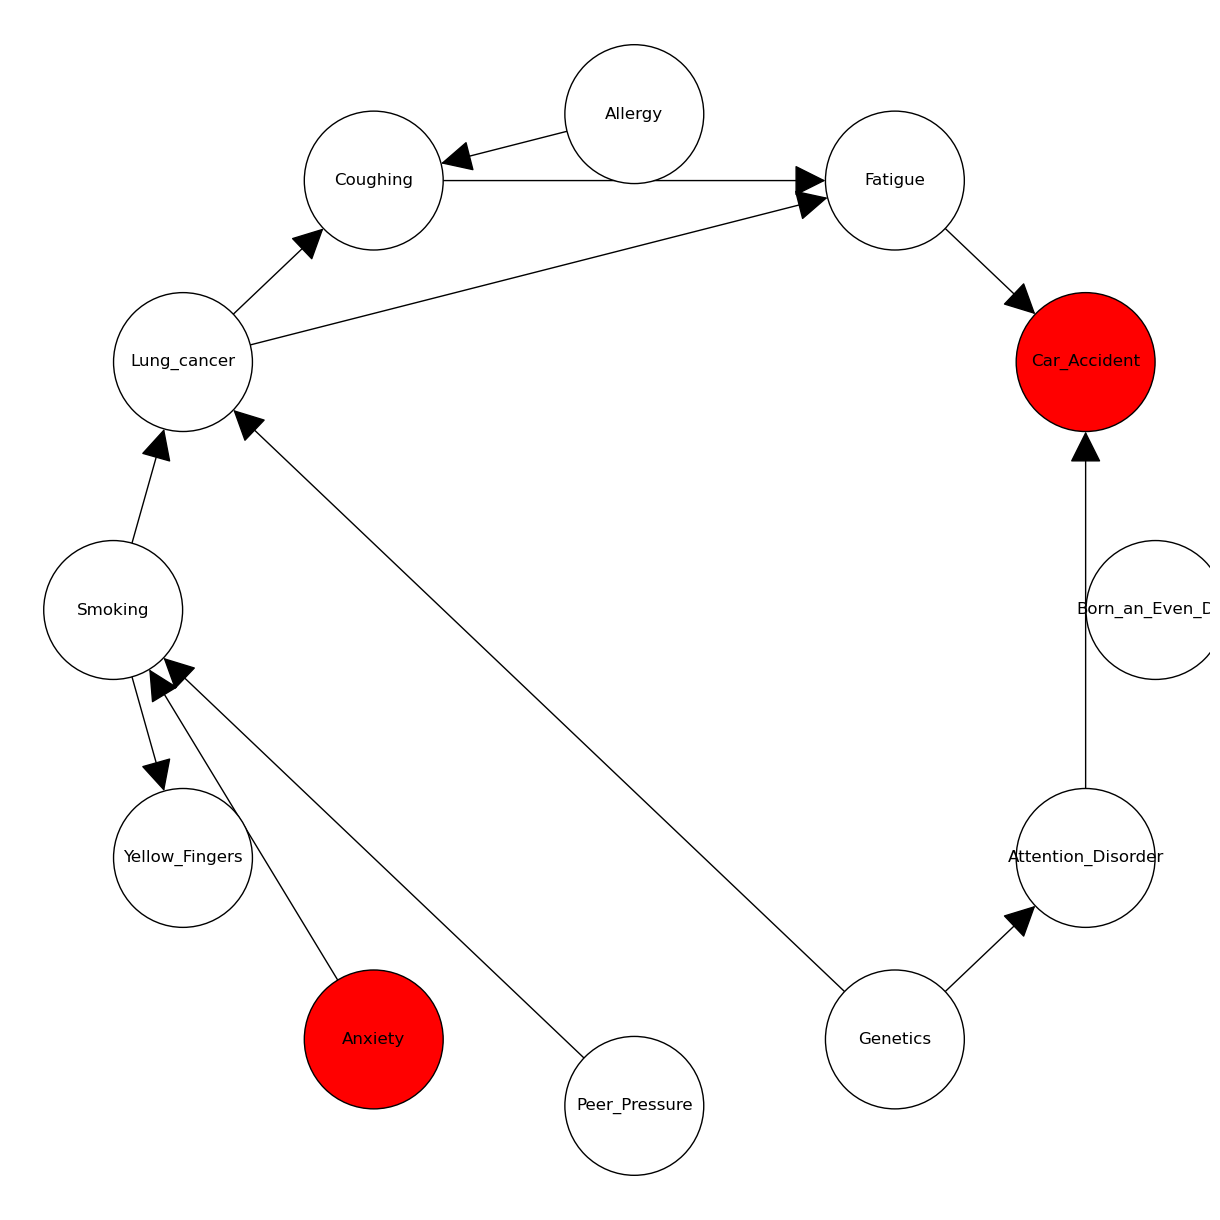

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(df.columns)
G.add_edges_from([('Anxiety', 'Smoking'),
                   ('Peer_Pressure', 'Smoking'),
                   ('Smoking', 'Yellow_Fingers'),
                   ('Smoking', 'Lung_cancer'),
                   ('Genetics', 'Lung_cancer'),
                   ('Genetics', 'Attention_Disorder'),
                   ('Lung_cancer', 'Fatigue'),
                   ('Lung_cancer', 'Coughing'),
                   ('Allergy', 'Coughing'),
                   ('Coughing', 'Fatigue'),
                   ('Attention_Disorder', 'Car_Accident'),
                   ('Fatigue', 'Car_Accident'),

                     ])
plt.figure(figsize=(12,12))

nx.draw_shell(G, with_labels=True, node_color = ['w', 'w', 'r', 'w', 'w', 'w', 'w', 'r', 'w', 'w', 'w', 'w'], arrowsize = 50, node_size = 10000, edgecolors='black', font_size=12)

In [ ]:
nx.write_gml(G, 'LUCAS.gml')

## Estimands

In [22]:
from dowhy.causal_identifier import backdoor
from dowhy import CausalModel

In [ ]:
# a utility function to parse the .gml file to string 
# From tutorial 3
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str

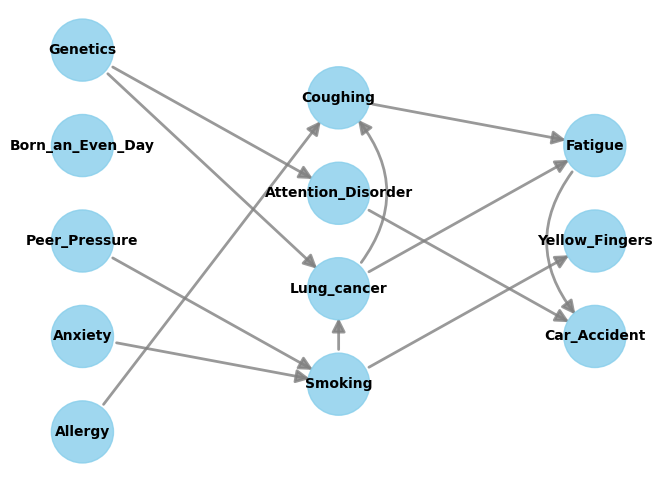

In [34]:
graph_str = gml_to_string('LUCAS.gml')

model=CausalModel(
    data = df,
    treatment='Anxiety',
    outcome='Car_Accident',
    graph=graph_str
)
model.view_model()

In [35]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
──────────(E[Car_Accident])
d[Anxiety]                 
Estimand assumption 1, Unconfoundedness: If U→{Anxiety} and U→Car_Accident then P(Car_Accident|Anxiety,,U) = P(Car_Accident|Anxiety,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡            d                                ∂                               ↪
E⎢──────────────────────────(Car_Accident)⋅──────────([Smoking  Yellow_Fingers ↪
 ⎣d[Smoking  Yellow_Fingers]               ∂[Anxiety]                          ↪

↪   ⎤
↪ ])⎥
↪   ⎦
Estimand assumption 1, Full-mediation: Smoking,Yellow_Fingers intercepts (blocks) all directed paths from Anxiety to C,a,r,_,A,c,c,i,d,e,n,t.
Estimand assumption 2, First-stage-unconfoundedness: If U→{Anxiety} and U→{Smoking,Yellow_Fingers} then P(Smoking,Yellow_Fingers|Anxiety,U) = 

In [36]:
identifier = model.identifier
identifier.identify_backdoor(model._graph._graph, model._treatment, model._outcome, list(model._graph.get_all_nodes(include_unobserved=False)))

[{'backdoor_set': set()},
 {'backdoor_set': ('Peer_Pressure',
   'Allergy',
   'Genetics',
   'Attention_Disorder')},
 {'backdoor_set': ('Peer_Pressure',)},
 {'backdoor_set': ('Allergy',)},
 {'backdoor_set': ('Genetics',)},
 {'backdoor_set': ('Attention_Disorder',)}]

## Estimating Causal Effect

In [47]:
from sklearn.linear_model import LinearRegression

In [52]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
──────────(E[Car_Accident])
d[Anxiety]                 
Estimand assumption 1, Unconfoundedness: If U→{Anxiety} and U→Car_Accident then P(Car_Accident|Anxiety,,U) = P(Car_Accident|Anxiety,)

## Realized estimand
b: Car_Accident~Anxiety+Anxiety*Peer_Pressure+Anxiety*Allergy+Anxiety*Genetics+Anxiety*Attention_Disorder
Target units: 

## Estimate
Mean value: 0.029664433911190446
### Conditional Estimates
__categorical__Peer_Pressure  __categorical__Allergy  __categorical__Genetics  __categorical__Attention_Disorder
(-0.001, 1.0]                 (-0.001, 1.0]           (-0.001, 1.0]            (-0.001, 1.0]                        0.029664
dtype: float64
Causal Estimate is 0.029664433911190446


/Users/jeremypalmerio/opt/miniconda3/envs/CDS/lib/python3.11/site-packages/dowhy/causal_estimator.py:266: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/Users/jeremypalmerio/opt/miniconda3/envs/CDS/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/Users/jeremypalmerio/opt/miniconda3/envs/CDS/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprec

In [57]:
# using the backdoor adjustment set and propensity score stratification
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="iv.instrumental_variable")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

Estimation failed! No relevant identified estimand available for this estimation method.
Causal Estimate is None


## Causal Discovery 

### PC algorithm 

In [17]:
from pgmpy.estimators import PC, ExpertKnowledge


In [18]:
alpha = 0.05
pc = PC(df)
pc_graph = pc.estimate(ci_test='pearsonr', return_type='cpdag', significance_level=alpha)


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Happiness Score': 'N', 'Standard Error': 'N', 'Economy (GDP per Capita)': 'N', 'Family': 'N', 'Health (Life Expectancy)': 'N', 'Freedom': 'N', 'Trust (Government Corruption)': 'N', 'Generosity': 'N', 'Dystopia Residual': 'N'}


  0%|          | 0/5 [00:00<?, ?it/s]

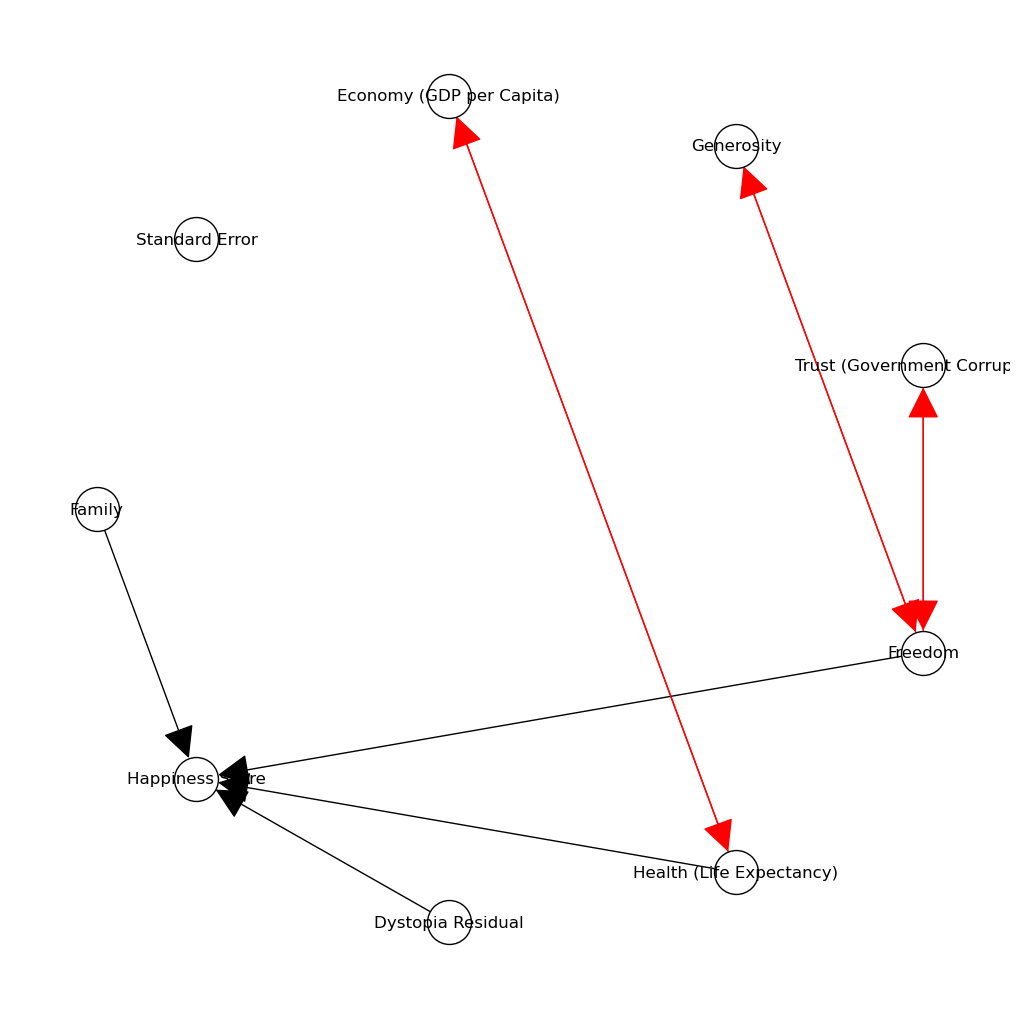

In [20]:
# Visualize the graph
plt.figure(figsize=(10,10))

colors = ['red'  if (y,x) in pc_graph.edges() else 'black' for (x,y) in pc_graph.edges()]
nx.draw_shell(pc_graph, with_labels=True, node_size=1000, font_size=12, arrowsize=50, node_color='w', edgecolors ='black', edge_color=colors)


In [24]:
df.columns

Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

INFO:dowhy.causal_model:Model to find the causal effect of treatment ['Trust (Government Corruption)'] on outcome ['Happiness Score']
INFO:dowhy.utils.plotting:Pygraphviz installation not found, falling back to networkx plotting. For better looking plots, consider installing pygraphviz. Note This requires both the Python pygraphviz package (``pip install pygraphviz``) and the shared system library (e.g. ``brew install graphviz`` or ``apt-get install graphviz``)


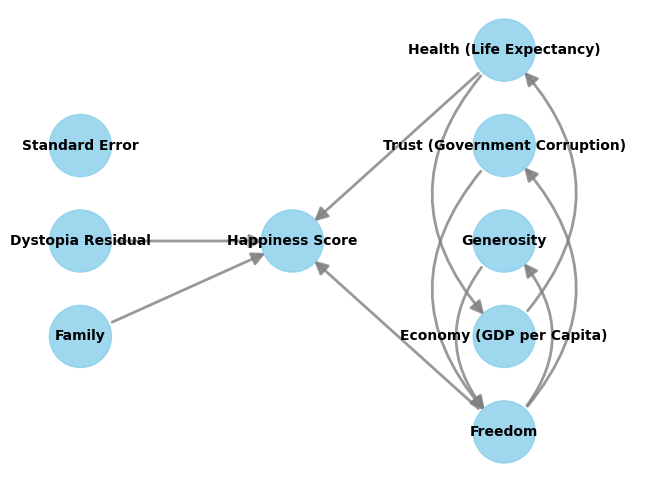

NetworkXError: graph should be directed acyclic

In [25]:
gml = ''.join(nx.generate_gml(pc_graph))
model = CausalModel(
        data = df,
        treatment='Trust (Government Corruption)',
        outcome='Happiness Score',
        graph=gml)
model.view_model()

identified_estimand = model.identify_effect()
print(identified_estimand)

estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print("Causal Estimate is " + str(estimate.value))

### GES 

In [28]:
from pgmpy.estimators import GES as pgmpy_ges
from pgmpy.estimators import ExhaustiveSearch, HillClimbSearch, BDeu, BIC


ges_graph_pgmpy = pgmpy_ges(df).estimate(scoring_method='pearsonr')
colors = ['red'  if (y,x) in ges_graph_pgmpy.edges() else 'black' for (x,y) in ges_graph_pgmpy.edges()]

plt.figure(figsize=(12,12))
nx.draw_shell(ges_graph_pgmpy, with_labels=True, node_size=500, node_color='w', edgecolors ='black', edge_color=colors)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Happiness Score': 'N', 'Standard Error': 'N', 'Economy (GDP per Capita)': 'N', 'Family': 'N', 'Health (Life Expectancy)': 'N', 'Freedom': 'N', 'Trust (Government Corruption)': 'N', 'Generosity': 'N', 'Dystopia Residual': 'N'}


ValueError: Unknown scoring method. Please refer documentation for a list of supported score metrics.